In [2]:
D.<x> = PolynomialRing(QQ)
R.<x> = PolynomialRing(QQ)
S = PowerSeriesRing(QQ,'x', default_prec=300)
L=LaurentSeriesRing(QQ,'x', default_prec=300)
#S.<x,y>=PowerSeriesRing(QQ,default_prec=300)
# Using "R = PolynomialRing(QQ,'x')" produces an error.
# Yet using S as defined here is fine (see definition of Fraleigh4 below)
# But S = PowerSeriesRing(QQ,'x','y') also produces an error.
R.<x> = PolynomialRing(QQ)
Scplx= PowerSeriesRing(CC,'x',default_prec=300)
def pochhammer(x,n):
    return product ([x+k for k in [0..n-1]])
def cRaleigh2(alpha,beta,nu):
    pchhmrA = pochhammer(alpha,nu)
    pchhmrB = pochhammer(beta,nu)
    fnu=factorial(nu)
    answer = D(pchhmrA*pchhmrB/fnu^2)
    return answer
def term(alpha,beta,p):
    return D(1/(alpha + p) + 1/(beta + p) - 2/(1 + p))
def eRaleigh(alpha, beta, nu):
    return D(sum([term(alpha, beta, p) for p in [0..nu - 1]]))
def FstarRaleigh2(alpha,beta,u,terms):
    fsr = sum([cRaleigh2(alpha, beta, nu)*eRaleigh(alpha,beta,nu)*u^nu for nu in [1..terms]])
    return D(fsr)
def Fraleigh2(alpha,beta,u,terms): 
    return D(sum([cRaleigh2(alpha,beta,nu)*u^nu for nu in [0..terms]]))
def FstarRaleigh3(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fsr2 = FstarRaleigh2(alpha,beta,x,n)
    return D(fsr2)
def Fraleigh4(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fr2 = Fraleigh2(alpha,beta,x,n)
    return D(fr2)
def exNo3c(n,m):
    a1 = S(x)*exp(S(FstarRaleigh3(n,m,x)/Fraleigh4(n,m,x))).O(2*n)
    # S(x) instead of x in df of a1 to avoid an error message
    # after use of the stripQuotationMarks command below.
    a2 = S(a1).O(n+1)
    return a2 # applying S to argument of exp is key.
def J(n,m):
    exn = exNo3c(n+2,m)
    jnm = 1/exn.reverse()
    return jnm.O(n+1) # Jtest is faster than J, and they agree.
def normalJ(n,m):
    f = J(n,m)
    return f.truncate(n+1)
def Jcoefficient(n,m):
    f = J(n+2,m)
    f1 = f.truncate(n+1)
    f1=f1.list()
    f1=Set(f1)
    g1 = f.truncate(n)
    g1 = g1.list()
    g1 = set(g1)
    h = f1.difference(g1)
    h = h.list()
    return h[0]
def xjNewStep(n,m): 
    f=J(n,m)
    fl=f.list()
    return (sum(c*x**i*(m**3*2**6)**i for i,c in enumerate(fl)))
def xjNew(n,m):
    return xjNewStep(n-1,m)
def xjNewCoefficient(n,m):
    if n>0:return (xjNew(n,m)-xjNew(n-1,m))/x^n
    if n==0:return 1
def xjNewTest(n,m):
    return D(xjNewStep(n-1,m))
def j(n,m):return xjNew(n,m)/x
def H4(n,m):
    jay=J(n+1,m) #conforms to published definition
    djay=x*derivative(jay,x) # bc variable is tau, not x; chain rule.
    numerator = djay^2
    denominator = jay*(jay-2^6*m^3)
    return ((S(numerator/denominator)^(1/(m-2))).O(n+1)).polynomial()
def H6(n,m): #different than in draft 4mar21 and Mathematica.
    def base6(n,m):
        jay=J(n+1,m)  #conforms to published definition
        num=(x*derivative(jay,x))^m # chain rule; variable is tau not x.
        den = expand(jay^(m-1)*(j(n+1,m)-2^6*m^3))
        return L((-1)^m*(num/den)).O(n+1)
    return (S(base6(n,m)^(1/(m-2))).polynomial())
def deltaStar(n,m):
    jay=j(n+1,m)
    djay=x*derivative(jay,x)
    numerator=djay^(2*m)
    denominator=jay^(2*m-2)*(jay-2^6*m^3)^m
    base=numerator/denominator
    xp=1/(m-2)
    power=S(base)^xp
    return (power.polynomial()).truncate(n+1)
def polynomialCoefficient(n,poly):
    return poly.list()[n]
def factorpairToFactor(factorpair):
    (monomial,exponent)=factorpair
    return monomial^exponent
def numericalfactor(polynomial):
    fp=polynomial.factor()
    lst=[factorpairToFactor(factorpair) for factorpair in fp]
    return polynomial/product(lst)
def lastfactor(polynomial):
    fp=polynomial.factor()
    fp=FiniteEnumeratedSet(fp)
    return factorpairToFactor(fp.last())
def reduced(polynomial):
    return numericalfactor(polynomial)*lastfactor(polynomial)
def stripQuotationMarks(string):
    var('x')
    return sage_eval(string,locals={'x':x})
def deltaDiamond(n,m):
    return D(S(expand((H4(n+2,m)^3)/j(n+2,m)))).truncate(n+1)
def nieburTau(n):
# The contortions below sidestep mysterious (to me) error messages...
# nieburTau is an algorith for Ramanujan''s tau from the paper
# "A formula for Ramanujan's tau-function" by Douglas Niebur.
# (He spells tau with the Greek letter.)
    def step1(n,k):
        return 35*k^4-52*k^3*n+18*k^2*n^2
    def step2(n,k):
        return sigma(k)*sigma(n-k)
    def step3(n):
        ans=0
        for k in [1..n-1]:
            ans=ans+step1(n,k)*step2(n,k)
        return 24*ans
    return n^4*sigma(n)-step3(n)
def deltaDagger(n,m):
    def ddstep1(n,m):
        return D(S(expand((H4(n+2,m)^3)))).truncate(n+1)
    def ddstep2(n,m):
        return D(S((H6(n+2,m)^2))).truncate(n+1)
    return (ddstep1(n,m)-ddstep2(n,m))/1728
def first(list):return list[0]
def last(list):return list[-1]

def rmnjntau(n):
    answer=0
    for k in [1..n-1]:
        answer=answer+(6*k-4*(n-k))*sigma(k,3)*sigma(n-k,5)
    answer=(5*sigma(n,3)+7*sigma(n,5))*n/12-35*answer
    return answer

def element(k,listo):
    if k>len(listo):return (print("bad k"))
    return listo[k-1]

def mobiusInverseOfFunction(g,n):
    dv=divisors(n)
    nd=len(dv)
    f=0
    for k in [1..nd]:
        dvk=element(k,dv)
        f=f+moebius(dvk)*g(n/dvk)
    return f

def mobiusInverseOfList(g,n):
    dv=divisors(n)
    nd=len(dv)
    f=0
    for k in [1..nd]:
        dvk=element(k,dv)
        gndvk=element(n/dvk,g)
        f=f+moebius(dvk)*gndvk
    return f

def drop_first_element(listo):
    lenth=len(listo)
    answer=[]
    for k in [1..lenth-1]:
        answer=answer+[listo[k]]
    return answer

def factorSeriesFromLists(lsst,bound):
    truncatedlist=drop_first_element(lsst)
    F=[element(1,truncatedlist)]
    nswr=[-mobiusInverseOfList(F,1)/1]
    for n in [2..bound]:
        summ=0
        for k in [1..n-1]:
            ekf=element(k,F)
            tnk=element(n-k,truncatedlist)
            summ=summ+ekf*tnk
        Fn=n*element(n,truncatedlist)-summ
        F=F+[Fn]
        xpn=-mobiusInverseOfList(F,n)/n
        nswr=nswr+[xpn]
    return nswr

def factorSeriesFromListsWithTracking(lsst,bound):
    truncatedlist=drop_first_element(lsst)
    F=[element(1,truncatedlist)]
    nswr=[-mobiusInverseOfList(F,1)/1]
    for n in [2..bound]:
        summ=0
        for k in [1..n-1]:
            ekf=element(k,F)
            tnk=element(n-k,truncatedlist)
            summ=summ+ekf*tnk
            print((n,k))
        Fn=n*element(n,truncatedlist)-summ
        F=F+[Fn]
        xpn=-mobiusInverseOfList(F,n)/n
        nswr=nswr+[xpn]
        print("answer length: ",len(nswr))
    return nswr



print("ok1")

ok1


In [18]:
for m in [3..12]:
    print("-----------------------------------------------------------------------")
    print(deltaDagger(5,m))

-----------------------------------------------------------------------
4830*x^5 - 1472*x^4 + 252*x^3 - 24*x^2 + x
-----------------------------------------------------------------------
-11033903104/9*x^5 - 466313216/27*x^4 - 894976/9*x^3 - 15200/27*x^2 + 58/27*x
-----------------------------------------------------------------------
-5193731694125/81*x^5 - 52964129375/162*x^4 - 66973250/81*x^3 - 159125/54*x^2 + 215/54*x
-----------------------------------------------------------------------
-1176821039104*x^5 - 9269411840/3*x^4 - 11468800/3*x^3 - 10240*x^2 + 20/3*x
-----------------------------------------------------------------------
-1671287131816288/135*x^5 - 179312406385/9*x^4 - 12605936*x^3 - 763763/27*x^2 + 280/27*x
-----------------------------------------------------------------------
-90386789826560*x^5 - 8071459766272/81*x^4 - 2635644928/81*x^3 - 1810048/27*x^2 + 412/27*x
-----------------------------------------------------------------------
-506599355441907*x^5 - 8276180

In [19]:
deltaDagger(4,3)

-1472*x^4 + 252*x^3 - 24*x^2 + x

In [20]:
deltaDagger(4,4)

-466313216/27*x^4 - 894976/9*x^3 - 15200/27*x^2 + 58/27*x

In [5]:
deltaDagger(4,5)

-52964129375/162*x^4 - 66973250/81*x^3 - 159125/54*x^2 + 215/54*x

In [21]:
poly=D(deltaDagger(100,3))
data=[]
ls=poly.list()
for n in [1..len(ls)-1]:
    data=data+[polynomialCoefficient(n,poly)-rmnjntau(n)]
print(data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [22]:
import pickle
vfile = open('/Users/barrybrent/8mar21no1.txt','rb') # H4 series
# from Jupyter notebook "H4 from scratch"
rv=pickle.load(vfile)
vfile.close()
v=stripQuotationMarks(rv)
ln=len(v)
poly=v[0][1]
deg=poly.degree(x)
print([ln,v[0][0],v[-1][0],deg])

[498, 3, 500, 120]


In [23]:
import pickle
rfile = open('/Users/barrybrent/16mar21no13.txt','rb') # H6 series
# from Jupyter notebook "H6 & H6 polynomials from scratch"
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
ln=len(s)
poly=s[0][1]
deg=poly.degree(x)
print([ln,s[0][0],s[-1][0],deg])

[398, 3, 400, 100]


In [24]:
import pickle
vfile = open('/Users/barrybrent/8mar21no1.txt','rb') # H4 series
# from Jupyter notebook "H4 from scratch"
rv=pickle.load(vfile)
vfile.close()
v=stripQuotationMarks(rv)

import pickle
sfile = open('/Users/barrybrent/16mar21no13.txt','rb') # H6 series
# from Jupyter notebook "H6 & H6 polynomials from scratch"
rs=pickle.load(sfile)
sfile.close()
s=stripQuotationMarks(rs)

import pickle
import time
wfile = open('/Users/barrybrent/19mar21no12.txt','w') # dagger series
data=[]

for n in [0..397]:
    start = time.time()
    m=s[n][0]
    h6squared=s[n][1]^2
    h4cubed=v[n][1]^3
    dagger=D(((h4cubed-h6squared)/1728)).truncate(100)
    data=data+[[m,dagger]]
    finish = time.time()
    print([m,finish-start])
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

[3, 0.012140035629272461]
4830*x^5 - 1472*x^4 + 252*x^3 - 24*x^2 + x


In [2]:
deltaDagger(5,3)

4830*x^5 - 1472*x^4 + 252*x^3 - 24*x^2 + x

In [16]:
import pickle
vfile = open('/Users/barrybrent/8mar21no1.txt','r') # H4 series
# from Jupyter notebook "H4 from scratch"
rv=pickle.load(vfile)
vfile.close()
v=stripQuotationMarks(rv)

import pickle
sfile = open('/Users/barrybrent/16mar21no13.txt','r') # H6 series
# from Jupyter notebook "H6 & H6 polynomials from scratch"
rs=pickle.load(sfile)
sfile.close()
s=stripQuotationMarks(rs)

import pickle
import time
wfile = open('/Users/barrybrent/19mar21no12.txt','w') # dagger series
data=[]

for n in [0..397]:
    start = time.time()
    m=s[n][0]
    h6squared=s[n][1]^2
    h4cubed=v[n][1]^3
    dagger=D(((h4cubed-h6squared)/1728)).truncate(100)
    data=data+[[m,dagger]]
    finish = time.time()
    print([m,finish-start])
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

[3, 0.012084007263183594]
[4, 0.01718282699584961]
[5, 0.030865907669067383]
[6, 0.013627052307128906]
[7, 0.032353878021240234]
[8, 0.03253889083862305]
[9, 0.03295493125915527]
[10, 0.03317999839782715]
[11, 0.03512692451477051]
[12, 0.032887935638427734]
[13, 0.03570199012756348]
[14, 0.03446006774902344]
[15, 0.03473401069641113]
[16, 0.03400111198425293]
[17, 0.035890817642211914]
[18, 0.0336458683013916]
[19, 0.03738903999328613]
[20, 0.03611612319946289]
[21, 0.03427600860595703]
[22, 0.0353548526763916]
[23, 0.036869049072265625]
[24, 0.03421187400817871]
[25, 0.036157846450805664]
[26, 0.037878990173339844]
[27, 0.03726506233215332]
[28, 0.03632807731628418]
[29, 0.03695392608642578]
[30, 0.03515291213989258]
[31, 0.03627300262451172]
[32, 0.038214921951293945]
[33, 0.039952993392944336]
[34, 0.03702402114868164]
[35, 0.03836202621459961]
[36, 0.0375521183013916]
[37, 0.03939509391784668]
[38, 0.038372039794921875]
[39, 0.037938833236694336]
[40, 0.038166046142578125]
[41, 0.0

[315, 0.0469820499420166]
[316, 0.04987597465515137]
[317, 0.04981803894042969]
[318, 0.04780697822570801]
[319, 0.047057151794433594]
[320, 0.046504974365234375]
[321, 0.04774308204650879]
[322, 0.048521995544433594]
[323, 0.050518035888671875]
[324, 0.04848194122314453]
[325, 0.048933982849121094]
[326, 0.04720115661621094]
[327, 0.04773712158203125]
[328, 0.04707908630371094]
[329, 0.049349069595336914]
[330, 0.04659104347229004]
[331, 0.04965090751647949]
[332, 0.049581050872802734]
[333, 0.04966306686401367]
[334, 0.0490419864654541]
[335, 0.046296119689941406]
[336, 0.044374942779541016]
[337, 0.048705101013183594]
[338, 0.0506439208984375]
[339, 0.04678201675415039]
[340, 0.04531693458557129]
[341, 0.047882080078125]
[342, 0.047808170318603516]
[343, 0.04944300651550293]
[344, 0.04825401306152344]
[345, 0.046792030334472656]
[346, 0.0470280647277832]
[347, 0.05100607872009277]
[348, 0.04861617088317871]
[349, 0.049139976501464844]
[350, 0.045269012451171875]
[351, 0.043759822845

In [3]:
import pickle
rfile = open('/Users/barrybrent/19mar21no12.txt','rb') # dagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
for k in [0..len(s)-1]:
    m = s[k][0]
    poly=D(s[k][1])
    data=data+[[k,poly.degree()]]
print(data) # correctness check: all of the series have the right degree.

[[0, 99], [1, 99], [2, 99], [3, 99], [4, 99], [5, 99], [6, 99], [7, 99], [8, 99], [9, 99], [10, 99], [11, 99], [12, 99], [13, 99], [14, 99], [15, 99], [16, 99], [17, 99], [18, 99], [19, 99], [20, 99], [21, 99], [22, 99], [23, 99], [24, 99], [25, 99], [26, 99], [27, 99], [28, 99], [29, 99], [30, 99], [31, 99], [32, 99], [33, 99], [34, 99], [35, 99], [36, 99], [37, 99], [38, 99], [39, 99], [40, 99], [41, 99], [42, 99], [43, 99], [44, 99], [45, 99], [46, 99], [47, 99], [48, 99], [49, 99], [50, 99], [51, 99], [52, 99], [53, 99], [54, 99], [55, 99], [56, 99], [57, 99], [58, 99], [59, 99], [60, 99], [61, 99], [62, 99], [63, 99], [64, 99], [65, 99], [66, 99], [67, 99], [68, 99], [69, 99], [70, 99], [71, 99], [72, 99], [73, 99], [74, 99], [75, 99], [76, 99], [77, 99], [78, 99], [79, 99], [80, 99], [81, 99], [82, 99], [83, 99], [84, 99], [85, 99], [86, 99], [87, 99], [88, 99], [89, 99], [90, 99], [91, 99], [92, 99], [93, 99], [94, 99], [95, 99], [96, 99], [97, 99], [98, 99], [99, 99], [100, 99]

In [7]:
import pickle
rfile = open('/Users/barrybrent/19mar21no12.txt','rb') # dagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print(len(s))
print(s[0])
print(s[1])

398
[3, -60754911516*x^99 + 40727164968*x^98 + 75013568546*x^97 - 49569988608*x^96 + 51494658600*x^95 - 64496363904*x^94 - 13316478336*x^93 - 27442896384*x^92 + 9673645072*x^91 + 13173496560*x^90 - 24992917110*x^89 + 45164021760*x^88 + 32358470760*x^87 + 411016992*x^86 - 33355661220*x^85 + 6211086336*x^84 - 29335099668*x^83 - 7394890608*x^82 + 1665188361*x^81 + 4767866880*x^80 + 38116845680*x^79 + 3494159424*x^78 - 8951543328*x^77 - 15693610240*x^76 - 6425804700*x^75 + 4373119536*x^74 + 1463791322*x^73 - 9600560640*x^72 + 9791485272*x^71 + 1940964480*x^70 + 4698104544*x^69 + 10165534848*x^68 - 15481826884*x^67 - 3233333376*x^66 - 2790474540*x^65 + 2699296768*x^64 + 1902838392*x^63 + 1268236032*x^62 + 6956478662*x^61 - 1791659520*x^60 - 5189203740*x^59 - 3081759120*x^58 + 2686677840*x^57 - 1414533120*x^56 + 2582175960*x^55 + 1758697920*x^54 - 1596055698*x^53 + 850430336*x^52 - 1740295368*x^51 + 611981400*x^50 - 1696965207*x^49 + 248758272*x^48 + 2687348496*x^47 - 447438528*x^46 - 548895

In [34]:
R.<x> = PowerSeriesRing(ZZ)

bound=30
def g(n):return rmnjntau(n)
lstt=[]
for k in [1..bound]:
    print("k: ",k)
    print("g(k): ",g(k))
    lstt=lstt+[g(k)]
print("lsst: ",lstt)
bound=29
fs=factorSeriesFromLists(lstt,bound)
print("fs: ",fs)

k:  1
g(k):  1
k:  2
g(k):  -24
k:  3
g(k):  252
k:  4
g(k):  -1472
k:  5
g(k):  4830
k:  6
g(k):  -6048
k:  7
g(k):  -16744
k:  8
g(k):  84480
k:  9
g(k):  -113643
k:  10
g(k):  -115920
k:  11
g(k):  534612
k:  12
g(k):  -370944
k:  13
g(k):  -577738
k:  14
g(k):  401856
k:  15
g(k):  1217160
k:  16
g(k):  987136
k:  17
g(k):  -6905934
k:  18
g(k):  2727432
k:  19
g(k):  10661420
k:  20
g(k):  -7109760
k:  21
g(k):  -4219488
k:  22
g(k):  -12830688
k:  23
g(k):  18643272
k:  24
g(k):  21288960
k:  25
g(k):  -25499225
k:  26
g(k):  13865712
k:  27
g(k):  -73279080
k:  28
g(k):  24647168
k:  29
g(k):  128406630
k:  30
g(k):  -29211840
lsst:  [1, -24, 252, -1472, 4830, -6048, -16744, 84480, -113643, -115920, 534612, -370944, -577738, 401856, 1217160, 987136, -6905934, 2727432, 10661420, -7109760, -4219488, -12830688, 18643272, 21288960, -25499225, 13865712, -73279080, 24647168, 128406630, -29211840]
fs:  [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,

In [47]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/19mar21no12.txt','rb') # dagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
bound=5
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
print(pre_g(0))
print("=======================================================================")
dfeg=drop_first_element(g(0))
print(dfeg)
fs=factorSeriesFromLists(dfeg,bound-1)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print([m(0),fs])

-60754911516*x^99 + 40727164968*x^98 + 75013568546*x^97 - 49569988608*x^96 + 51494658600*x^95 - 64496363904*x^94 - 13316478336*x^93 - 27442896384*x^92 + 9673645072*x^91 + 13173496560*x^90 - 24992917110*x^89 + 45164021760*x^88 + 32358470760*x^87 + 411016992*x^86 - 33355661220*x^85 + 6211086336*x^84 - 29335099668*x^83 - 7394890608*x^82 + 1665188361*x^81 + 4767866880*x^80 + 38116845680*x^79 + 3494159424*x^78 - 8951543328*x^77 - 15693610240*x^76 - 6425804700*x^75 + 4373119536*x^74 + 1463791322*x^73 - 9600560640*x^72 + 9791485272*x^71 + 1940964480*x^70 + 4698104544*x^69 + 10165534848*x^68 - 15481826884*x^67 - 3233333376*x^66 - 2790474540*x^65 + 2699296768*x^64 + 1902838392*x^63 + 1268236032*x^62 + 6956478662*x^61 - 1791659520*x^60 - 5189203740*x^59 - 3081759120*x^58 + 2686677840*x^57 - 1414533120*x^56 + 2582175960*x^55 + 1758697920*x^54 - 1596055698*x^53 + 850430336*x^52 - 1740295368*x^51 + 611981400*x^50 - 1696965207*x^49 + 248758272*x^48 + 2687348496*x^47 - 447438528*x^46 - 548895690*x^45

In [52]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/19mar21no12.txt','rb') # dagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
bound=98
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
print(pre_g(0))
print("=======================================================================")
dfeg=drop_first_element(g(0))
print(dfeg)
fs=factorSeriesFromLists(dfeg,bound-1)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print([m(0),fs])

-60754911516*x^99 + 40727164968*x^98 + 75013568546*x^97 - 49569988608*x^96 + 51494658600*x^95 - 64496363904*x^94 - 13316478336*x^93 - 27442896384*x^92 + 9673645072*x^91 + 13173496560*x^90 - 24992917110*x^89 + 45164021760*x^88 + 32358470760*x^87 + 411016992*x^86 - 33355661220*x^85 + 6211086336*x^84 - 29335099668*x^83 - 7394890608*x^82 + 1665188361*x^81 + 4767866880*x^80 + 38116845680*x^79 + 3494159424*x^78 - 8951543328*x^77 - 15693610240*x^76 - 6425804700*x^75 + 4373119536*x^74 + 1463791322*x^73 - 9600560640*x^72 + 9791485272*x^71 + 1940964480*x^70 + 4698104544*x^69 + 10165534848*x^68 - 15481826884*x^67 - 3233333376*x^66 - 2790474540*x^65 + 2699296768*x^64 + 1902838392*x^63 + 1268236032*x^62 + 6956478662*x^61 - 1791659520*x^60 - 5189203740*x^59 - 3081759120*x^58 + 2686677840*x^57 - 1414533120*x^56 + 2582175960*x^55 + 1758697920*x^54 - 1596055698*x^53 + 850430336*x^52 - 1740295368*x^51 + 611981400*x^50 - 1696965207*x^49 + 248758272*x^48 + 2687348496*x^47 - 447438528*x^46 - 548895690*x^45

In [54]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/19mar21no12.txt','rb') # dagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
bound=98
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
for index in [0..2]:
    print("************************************************************************")
    print("index: ",index)
    print(pre_g(index))
    print("=======================================================================")
    dfeg=drop_first_element(g(index))
    print(dfeg)
    fs=factorSeriesFromLists(dfeg,bound-1)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print([m(index),fs])

************************************************************************
index:  0
-60754911516*x^99 + 40727164968*x^98 + 75013568546*x^97 - 49569988608*x^96 + 51494658600*x^95 - 64496363904*x^94 - 13316478336*x^93 - 27442896384*x^92 + 9673645072*x^91 + 13173496560*x^90 - 24992917110*x^89 + 45164021760*x^88 + 32358470760*x^87 + 411016992*x^86 - 33355661220*x^85 + 6211086336*x^84 - 29335099668*x^83 - 7394890608*x^82 + 1665188361*x^81 + 4767866880*x^80 + 38116845680*x^79 + 3494159424*x^78 - 8951543328*x^77 - 15693610240*x^76 - 6425804700*x^75 + 4373119536*x^74 + 1463791322*x^73 - 9600560640*x^72 + 9791485272*x^71 + 1940964480*x^70 + 4698104544*x^69 + 10165534848*x^68 - 15481826884*x^67 - 3233333376*x^66 - 2790474540*x^65 + 2699296768*x^64 + 1902838392*x^63 + 1268236032*x^62 + 6956478662*x^61 - 1791659520*x^60 - 5189203740*x^59 - 3081759120*x^58 + 2686677840*x^57 - 1414533120*x^56 + 2582175960*x^55 + 1758697920*x^54 - 1596055698*x^53 + 850430336*x^52 - 1740295368*x^51 + 611981400*x^50 - 1

In [66]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/19mar21no12.txt','rb') # dagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
bound=98
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
for index in [0..2]:
    dfeg=drop_first_element(g(index))
    fs=factorSeriesFromLists(dfeg,bound-1)
    data=data+[[m(index),fs]]
print(data)

[[3, [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]], [4, [15200/27, 187807856/729, 7837307276192/59049, 38539883539831552/531441, 611011468571436134944/14348907, 30273793867433033121537680/1162261467, 171397808325717027058508044640/10460353203, 2971855535894973242291141970624512/282429536481, 471121197114465645362383444691548332032/68630377364883, 933571016696543856519539169928015472497744/205891132094649, 16817808712453775235396963240987183584139995872/5559060566555523, 916467015488702306362536331182008601702084252583168/450283905890997363, 5587894702586626221273808439060614904626399052957358368/4052555153018976267, 10282015783698705145393551452340

In [67]:
len(data)

3

In [68]:
print(data[0])

[3, [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]]


In [69]:
print(data[1])

[4, [15200/27, 187807856/729, 7837307276192/59049, 38539883539831552/531441, 611011468571436134944/14348907, 30273793867433033121537680/1162261467, 171397808325717027058508044640/10460353203, 2971855535894973242291141970624512/282429536481, 471121197114465645362383444691548332032/68630377364883, 933571016696543856519539169928015472497744/205891132094649, 16817808712453775235396963240987183584139995872/5559060566555523, 916467015488702306362536331182008601702084252583168/450283905890997363, 5587894702586626221273808439060614904626399052957358368/4052555153018976267, 102820157836987051453935514523405830719786798899104705579760/109418989131512359209, 5704939371902104394363302319069434851872923648447702209833445088/8862938119652501095929, 35327734750272605791388659234455640242991748937765907032019572883456/79766443076872509863361, 658872813588426024763848414815266026305381907053019611495076882252378784/2153693963075557766310747, 1109775798350277336301168184408689943598911455751610238462921

In [70]:
print(data[2])

[5, [159125/54, 30134246875/5832, 5334578555202125/472392, 931913104277967908125/34012224, 32562804409511377157592925/459165024, 28446675671956448940606473685625/148769467776, 4970157919745886450313311468353014625/9372476469888, 6078645536274928457055035024048124555796375/4048909834991616, 1062051107834903908181791892560512307424248694375/245971272475740672, 37111970078168150559276080568160498690444722183570875/2951655269708888064, 2947337880642782594152533999364932018747308045796152831125/79694692282139977728, 5664495138837066615833100980021649157549930210342363695621874375/51642160598826705567744, 989691421310191418694374678100217100027172196843488060643504730462375/3021066395031362275713024, 321132097144443741261225161701959710030407394522268886982855948647873778125/326275170663387125777006592, 549855265798896160901215757981983699954324158088372610601156601781087301676980025/184998021766140500315562737664, 48034910983710572506967932524789471036597123098802062458390237395112017367590

In [71]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/19mar21no12.txt','rb') # dagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
bound=98
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
print(len(s))

398


In [74]:
print(g(397))

[0, 48040600/27, -39693218235200000/27, 1762259570205804544000000/9, -1329878351854086124471091200000000/27, 91712043923499610523634238383718400000000/27, -5876657672877982273541078814383824437248000000000/9, 963192728471531870916805156445118352133718016000000000000/27, -168752637960571939801782741553343661804616148257341440000000000000/27, 2729355128411294529444151386548309298699817373243281506304000000000000000/9, -3717100714112532686359974808713229881072580326362185938211805593600000000000000000/81, 164186322965103819828224677611525934501757422866339435670091382447658762240000000000000000/81, -3090971185673780008547077023437451975790745228392010111203800897325842594529280000000000000000000/9, 1027198658036813490121334833665006453745012388983614098361050265067183528238237561651200000000000000000000/81, -2060382118816052946840367058859042893066751270570758085654880068670170934011292418624129597440000000000000000000000/1053, 3110888136262330435217415437145235522156540516294687343992300

In [79]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/19mar21no12.txt','rb') # dagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
bound=98
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
for index in [0..3]:
    print("index: ",index)
    dfeg=drop_first_element(g(index))
    fs=factorSeriesFromLists(dfeg,bound-1)
    data=data+[[m(index),fs]]

wfile = open('/Users/barrybrent/24aug22.txt','wb')
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

index:  0
index:  1
index:  2
index:  3


In [76]:
import pickle
rfile = open('/Users/barrybrent/24aug22.txt','rb') # dagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print(len(s))

4


In [4]:
import pickle
rfile = open('/Users/barrybrent/24aug22.txt','rb') # dagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
for k in [0..0]:
    print(s[k])
    lnth=len(s[k][1])
    print(lnth)

[3, [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]]
97


In [2]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/19mar21no12.txt','rb') # dagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
bound=98
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
for index in [0..3]:
    print("index: ",index)
    dfeg=drop_first_element(g(index))
    fs=factorSeriesFromLists(dfeg,bound-1)
    data=data+[[m(index),fs]]

wfile = open('/Users/barrybrent/24aug22no2.txt','wb')
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

index:  0
index:  1
index:  2
index:  3


In [3]:
import pickle
rfile = open('/Users/barrybrent/24aug22no2.txt','rb') # dagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
for k in [0..3]:
    print(s[k])

[3, [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]]
[4, [15200/27, 187807856/729, 7837307276192/59049, 38539883539831552/531441, 611011468571436134944/14348907, 30273793867433033121537680/1162261467, 171397808325717027058508044640/10460353203, 2971855535894973242291141970624512/282429536481, 471121197114465645362383444691548332032/68630377364883, 933571016696543856519539169928015472497744/205891132094649, 16817808712453775235396963240987183584139995872/5559060566555523, 916467015488702306362536331182008601702084252583168/450283905890997363, 5587894702586626221273808439060614904626399052957358368/4052555153018976267, 1028201578369870514539355145234058

In [4]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/19mar21no12.txt','rb') # dagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
bound=98
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
for index in [0..397]:
    print("index: ",index)
    dfeg=drop_first_element(g(index))
    fs=factorSeriesFromLists(dfeg,bound-1)
    data=data+[[m(index),fs]]

wfile = open('/Users/barrybrent/24aug22no3.txt','wb') #dagger Euler exponents
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

index:  0
index:  1
index:  2
index:  3
index:  4
index:  5
index:  6
index:  7
index:  8
index:  9
index:  10
index:  11
index:  12
index:  13
index:  14
index:  15
index:  16
index:  17
index:  18
index:  19
index:  20
index:  21
index:  22
index:  23
index:  24
index:  25
index:  26
index:  27
index:  28
index:  29
index:  30
index:  31
index:  32
index:  33
index:  34
index:  35
index:  36
index:  37
index:  38
index:  39
index:  40
index:  41
index:  42
index:  43
index:  44
index:  45
index:  46
index:  47
index:  48
index:  49
index:  50
index:  51
index:  52
index:  53
index:  54
index:  55
index:  56
index:  57
index:  58
index:  59
index:  60
index:  61
index:  62
index:  63
index:  64
index:  65
index:  66
index:  67
index:  68
index:  69
index:  70
index:  71
index:  72
index:  73
index:  74
index:  75
index:  76
index:  77
index:  78
index:  79
index:  80
index:  81
index:  82
index:  83
index:  84
index:  85
index:  86
index:  87
index:  88
index:  89
index:  90
index:  9

In [5]:
import pickle
rfile = open('/Users/barrybrent/24aug22no3.txt','rb')  #dagger Euler exponents
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print(len(s))

398


In [7]:
import pickle
rfile = open('/Users/barrybrent/24aug22no3.txt','rb')  #dagger Euler exponents
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print(s[0])

[3, [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]]


In [6]:
import pickle
rfile = open('/Users/barrybrent/24aug22no3.txt','rb') #dagger Euler exponents
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print(s[397])

[400, [39693218235200000/27, 787775644190581178730905760800000/729, 62538695464536908272073798212083047961960939200000/59049, 620590465579914295972948569038912565064999266675544459952128000000/531441, 19706584442566118786929583663524453559619650746821489058498935429873184677415360000/14348907, 1955544215203044630572508019155520741385376617075047005828580858369451879241726389821843197087200000/1162261467, 22177667505769962551806956047416817134102510795668533269259001637452082746421100878363872471445675145493585569600000/10460353203, 770265051937389581064600300991922764576525213802141801185111707611910867731843175259000558874395222308902413437464022981017600000000/282429536481, 244594368284040069885361163004155188623795045086155558240136363702344240130452469667732905061108711422660613143961393658795633381244632823398400000000/68630377364883, 9708736759799724668049534580680283449078718005509017218645791338407817543554379428781829359308243220822745230365964600952888529699791623758943756561

In [7]:
# interpolating polynomials
import pickle
rfile = open('/Users/barrybrent/24aug22no3.txt','rb') #dagger Euler exponents
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
polydata=[]
import time
wfile = open('/Users/barrybrent/6sept22no1.txt','wb') #dagger Euler exponents polynomials
for qpower in [0..66]: 
    # the polynomial degrees are 6k + 6, so restrict qpower to obtain valid interpolations
    start = time.time()
    data=[]
    for k in [0..len(s)-1]:
        m = s[k][0]
        poly=D(s[k][1])
        cf=polynomialCoefficient(qpower,poly)
        data=data+[[m,cf]]
    rl=R.lagrange_polynomial(data)
    polydata=polydata+[[qpower,rl]] 
    rl=D(rl)
    finish = time.time()
    print([qpower,rl.degree(),finish-start])
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close()

[0, 6, 0.328873872756958]
[1, 12, 0.33786821365356445]
[2, 18, 0.28920412063598633]
[3, 24, 0.3366811275482178]
[4, 30, 0.32951998710632324]
[5, 36, 0.32644200325012207]
[6, 42, 0.33295702934265137]
[7, 48, 0.3384740352630615]
[8, 54, 0.34276795387268066]
[9, 60, 0.3440699577331543]
[10, 66, 0.30404019355773926]
[11, 72, 0.3459351062774658]
[12, 78, 0.35027289390563965]
[13, 84, 0.34993910789489746]
[14, 90, 0.3528599739074707]
[15, 96, 0.36941099166870117]
[16, 102, 0.3727250099182129]
[17, 108, 0.3883171081542969]
[18, 114, 0.34133005142211914]
[19, 120, 0.39620018005371094]
[20, 126, 0.40485191345214844]
[21, 132, 0.4130849838256836]
[22, 138, 0.4150369167327881]
[23, 144, 0.4321129322052002]
[24, 150, 0.43530797958374023]
[25, 156, 0.4436171054840088]
[26, 162, 0.40447163581848145]
[27, 168, 0.44782090187072754]
[28, 174, 0.46166324615478516]
[29, 180, 0.462904691696167]
[30, 186, 0.4843456745147705]
[31, 192, 0.49663209915161133]
[32, 198, 0.497607946395874]
[33, 204, 0.5110650062

exponent:  66
polynomial:  920743204552897544792177104912757245716812502318868727802762583469586369634951698495050794186117/947616442248492128869445349961766418782222305994665080521839986344728020010849046676664312051738488078336*x^397 - 736241478151878460154263576230657070246665932121007417613583074979315103511592595808371203849207468391/11371397306981905546433344199541197025386667671935980966262079836136736240130188560119971744620861856940032*x^396 + 37714335277754479359719890719757012189849203189337542383039891110141042548334972250949112668437957697077287/17057095960472858319650016299311795538080001507903971449393119754205104360195282840179957616931292785410048*x^395 - 6988212253616297037385622605538240402337103122310576157588405902660270823451572569498239214747886860928785266289/136456767683782866557200130394494364304640012063231771595144958033640834881562262721439660935450342283280384*x^394 + 33183340133681703570751748150849673486801614722454345793964079758976054245179261597798557

j:  0
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
j:  19
j:  20
j:  21
j:  22
j:  23
j:  24
j:  25
j:  26
j:  27
j:  28
j:  29
j:  30
j:  31
j:  32
j:  33
j:  34
j:  35
j:  36
j:  37
j:  38
j:  39
j:  40
j:  41
j:  42
j:  43
j:  44
j:  45
j:  46
j:  47
j:  48
j:  49
j:  50
j:  51
j:  52
j:  53
j:  54
j:  55
j:  56
j:  57
j:  58
j:  59
j:  60
j:  61
j:  62
j:  63
j:  64
j:  65
j:  66
j:  67
j:  68
j:  69
j:  70
j:  71
j:  72
j:  73
j:  74
j:  75
j:  76
j:  77
j:  78
j:  79
j:  80
j:  81
j:  82
j:  83
j:  84
j:  85
j:  86
j:  87
j:  88
j:  89
j:  90
j:  91
j:  92
j:  93
j:  94
j:  95
j:  96
j:  97
j:  98
j:  99
j:  100
j:  101
j:  102
j:  103
j:  104
j:  105
j:  106
j:  107
j:  108
j:  109
j:  110
j:  111
j:  112
j:  113
j:  114
j:  115
j:  116
j:  117
j:  118
j:  119
j:  120
j:  121
j:  122
j:  123
j:  124
j:  125
j:  126
j:  127
j:  128
j:  129
j:  130
j:  131
j:  132
j:  133
j:  134
j:  135
j:  136
j:  137
j:  13

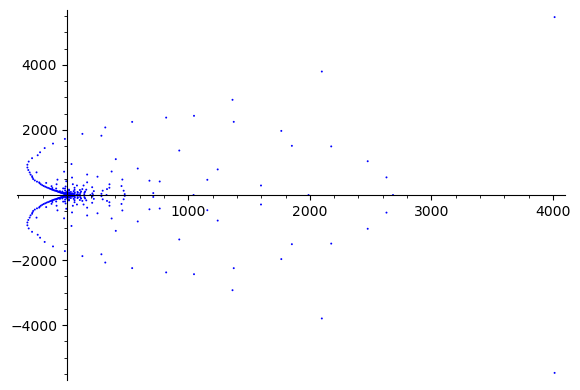

In [8]:
import pickle
rfile = open('/Users/barrybrent/6sept22no1.txt','rb') #dagger Euler exponents polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
for k in [66..66]:
    print("=====================================================================================")
    print("exponent: ",s[k][0])
    points=[]
    poly=s[k][1]
    print("polynomial: ",poly)
    poly=R(poly)
    pr=poly.roots(CC)
    lpr=len(pr)
    roots=[]
    for j in [0..lpr-1]:
        print("j: ",j)
        root=pr[j][0]
        imroot=imaginary(root)
        rlroot=real(root)
        rootpair=(rlroot,imroot)
        roots=roots+[rootpair]
       
    rootplot=list_plot(roots,color='blue',size=2)
    show(rootplot)

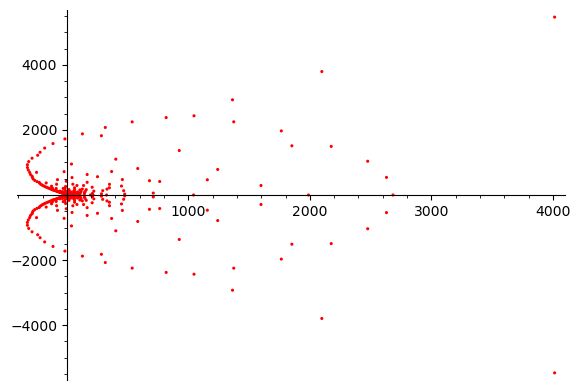

In [10]:
rootplot=list_plot(roots,color='red',size=5)
show(rootplot)

exponent:  20
polynomial:  247064529073450392704413/10105825871365862955286167558291456*x^126 - 1805471558613675946686095/1443689410195123279326595365470208*x^125 + 16962661129226301222185231/541383528823171229747473262051328*x^124 - 10110913657509257702035256083/19489807037634164270909037433847808*x^123 + 84476748853343626362710883743/12993204691756109513939358289231872*x^122 - 2618861260590393013428437351797/38979614075268328541818074867695616*x^121 + 106470442145999508648703574025551/175408263338707478438181336904630272*x^120 - 3052532421423868638448731620132713/613928921685476174533634679166205952*x^119 + 19812666989922309763636851757320727/526224790016122435314544010713890816*x^118 - 3785013156315531673718030946694209005/14208069330435305753492688289275052032*x^117 + 31547509372044169101499354677897916607/17760086663044132191865860361593815040*x^116 - 5992911050631770031356919410540879559607/532802599891323965755975810847814451200*x^115 + 652522031180639335162324616330940693632131

j:  0
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
j:  19
j:  20
j:  21
j:  22
j:  23
j:  24
j:  25
j:  26
j:  27
j:  28
j:  29
j:  30
j:  31
j:  32
j:  33
j:  34
j:  35
j:  36
j:  37
j:  38
j:  39
j:  40
j:  41
j:  42
j:  43
j:  44
j:  45
j:  46
j:  47
j:  48
j:  49
j:  50
j:  51
j:  52
j:  53
j:  54
j:  55
j:  56
j:  57
j:  58
j:  59
j:  60
j:  61
j:  62
j:  63
j:  64
j:  65
j:  66
j:  67
j:  68
j:  69
j:  70
j:  71
j:  72
j:  73
j:  74
j:  75
j:  76
j:  77
j:  78
j:  79
j:  80
j:  81
j:  82
j:  83
j:  84
j:  85
j:  86
j:  87
j:  88
j:  89
j:  90
j:  91
j:  92
j:  93
j:  94
j:  95
j:  96
j:  97
j:  98
j:  99
j:  100
j:  101
j:  102
j:  103
j:  104
j:  105
j:  106
j:  107
j:  108
j:  109
j:  110
j:  111
j:  112
j:  113
j:  114
j:  115
j:  116
j:  117
j:  118
j:  119
j:  120
j:  121
j:  122
j:  123
j:  124


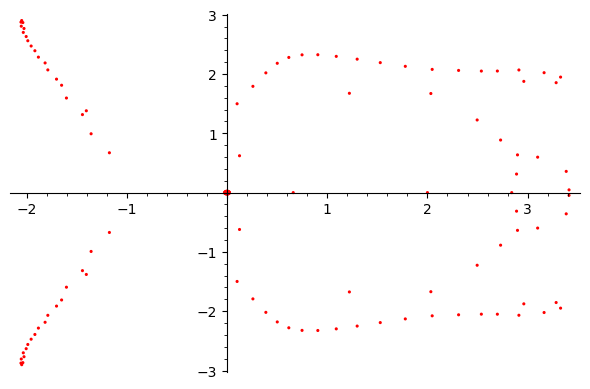

In [13]:
import pickle
rfile = open('/Users/barrybrent/6sept22no1.txt','rb') #dagger Euler exponents polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
for k in [20..20]:
    print("=====================================================================================")
    print("exponent: ",s[k][0])
    points=[]
    poly=s[k][1]
    print("polynomial: ",poly)
    poly=D(poly)
    pr=poly.roots(CC)
    lpr=len(pr)
    roots=[]
    for j in [0..lpr-1]:
        print("j: ",j)
        root=pr[j][0]
        imroot=imaginary(root)
        rlroot=real(root)
        rootpair=(rlroot,imroot)
        roots=roots+[rootpair]
       
    rootplot=list_plot(roots,color='red',size=5)
    show(rootplot)

In [3]:
import pickle
rfile = open('/Users/barrybrent/6sept22no1.txt','rb') #dagger Euler exponents polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
for k in [0..3]:
    print("====================================================================")
    print("k: ",k)
    print("poly:")
    print(s[k][1])

k:  0
poly:
13/36*x^6 - 95/108*x^5 + 11/18*x^4 - 65/27*x^3 - 10/9*x^2
k:  1
poly:
169/2592*x^12 - 1235/3888*x^11 + 14173/23328*x^10 - 4247/1944*x^9 + 83603/5832*x^8 - 9694/243*x^7 + 312367/5832*x^6 - 16337/216*x^5 + 12143/972*x^4 + 1667/162*x^3 + 5/9*x^2
k:  2
poly:
2197/139968*x^18 - 16055/139968*x^17 + 150787/419904*x^16 - 4572359/3779136*x^15 + 501487/69984*x^14 - 2219165/78732*x^13 + 1815211/26244*x^12 - 13179041/78732*x^11 + 6851929/13122*x^10 - 90608741/59049*x^9 + 6357710/2187*x^8 - 22139080/6561*x^7 + 23579683/8748*x^6 - 1046633/2916*x^5 - 48163/486*x^4 + 65/81*x^3 + 10/27*x^2
k:  3
poly:
28561/6718464*x^24 - 208715/5038848*x^23 + 1815229/10077696*x^22 - 30423029/45349632*x^21 + 1973441713/544195584*x^20 - 384648733/22674816*x^19 + 3764064461/68024448*x^18 - 916913995/5668704*x^17 + 228368723/419904*x^16 - 105257905/59049*x^15 + 12382887143/2657205*x^14 - 45202967401/4428675*x^13 + 19192611858127/850305600*x^12 - 2600804861087/47239200*x^11 + 34076616238481/283435200*x^10 - 169

In [7]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/19mar21no12.txt','rb') # dagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
for k in [0..3]:
    print("===========================================================")
    print("index: ",s[k][0])
    print("polynomial:")
    f=D(s[k][1])
    f=f.truncate(4)
    print(f)

index:  3
polynomial:
252*x^3 - 24*x^2 + x
index:  4
polynomial:
-894976/9*x^3 - 15200/27*x^2 + 58/27*x
index:  5
polynomial:
-66973250/81*x^3 - 159125/54*x^2 + 215/54*x
index:  6
polynomial:
-11468800/3*x^3 - 10240*x^2 + 20/3*x
